## Contents <a id="top"></a>
### [Step 0: Exploratory Data Analysis (EDA)](#step0)
### [Step 1: Load Data into Jupyter Notebook](#step1)
### [Step 2: Data Preprocessing ](#step2)
### [Step 3: Train and Test Split](#step3)
### [Step 4: Missing Value Imputation](#step4)
### [Step 5: Categorical Data Encoding](#step5)
### [Step 6: Variable Discretization /Binning](#step6)
### [Step 7: Feature Engineer](#step7)
### [Step 8: Linear Regression Model](#step8)

<hr>

## Report 
### [1. Introduction](#part1.)
   - [1.1. Introduction: Problem Understanding](#part1.1.) 
   
### [2. Explore the Data](#part2.)
   - [2.1. Relationship between Outlet Location Type and Outlet Sales](#part2.1.) 
   - [2.2. Relationship between Item Type and Item Outlet Sales ](#part2.2.) 
   - [2.3. Relationship between Item Visibility and Item Outlet Sales ](#part2.3.)
   - [2.4. Relationship between Outlet Type & Outlet Identifer and Item Outlet Sales](#part2.4.)
   - [2.5. Relationship between Item Outlet Sales and Outlet Establishment Year](#part2.5.)
   - [2.6. Relationship between Item Outlet Sales and Item Weight ](#part2.6.)    

### [3. Cleanse the Data](#part3.)
   - [3.1. Outliers](#part3.1.) 
      - [3.1.1. Finding Outliers](#part3.1.1.) 
      - [3.1.2. Dealing with Outliers](#part3.1.2.) 
      
      
   - [3.2. Missing Data](#part3.2.) 
      - [3.2.1. Finding Missing Data](#part3.2.1.) 
      - [3.2.2. Dealing with Missing Data](#part3.2.2.) 

### [4. Data Transformation](#part4.)
   - [4.1. Categorical Data](#part4.1.)
      - [4.1.1. Ordinal Encoding](#part4.1.1.)    
      - [4.1.2. One Hot Encoding](#part4.1.2.)    
      - [4.1.3. One Hot Encoding for Top Categories](#part4.1.3.) 


   - [4.2. Numerical Data](#part4.2.)
      - [4.2.1. Item Weight Transformation](#part4.2.1.)    
      - [4.2.2. Item Visibility Transformation](#part4.2.2.)    
      - [4.2.3. Item MRP Transformation](#part4.2.3.) 
      - [4.2.4. Outlet Establishment Year Binning](#part4.2.4.) 
      - [4.2.5. Item Weight Binning ](#part4.2.5.) 
      
### [5. Feature Engineer](#part5.)
   - [5.1. Feature Scaling](#part5.1.)
   - [5.2. Create new features /Drop features](#part5.2.)
      - [5.2.1. Principal Component Analysis (PCA) ](#part5.2.1.) 
      
### [6. Linear Regression Model](#part6.)      
   - [6.1. Build and Evaluate the model](#part6.1.)  
   
### [7. Summary and Further Improvements](#part7.)      
   - [7.1. Summarize findings](#part7.1.)     
   - [7.2. Explain possible further improvements](#part7.2.)      


In [1]:
# import the pacakges
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# Dealing with outliers
from feature_engine.outliers import Winsorizer

# Transforming numerical variables 
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer

from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import OneHotEncoder

from feature_engine.encoding import CountFrequencyEncoder
# for discretization
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler
# the scalers - for mean normalisation
from sklearn.preprocessing import RobustScaler
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler

### Step 0: Exploratory Data Analysis (EDA) <a id="step0"></a>
Investingating/Finding relationships between different variables. Detailed EDA in Report.
#### [To - 2. Explore the Data](#part2.)

### Step 1: Load Data into Jupyter Notebook <a id="step1"></a>
[Back to Top](#top)

In [2]:
data = pd.read_csv("./data/supermarket.csv")

In [3]:
# data_backup is orginal data
data_backup = data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Step 2: Data Preprocessing <a id="step2"></a>
[Back to Top](#top)

### Finding and Dealing with Outliers

In [7]:
#Finding Outlier for numerical variables in dataset
def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #Finding the IQR using .quantile(.75 and .25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5) #Formula 
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [8]:
upper_boundary, lower_boundary = find_boundaries(data, 'Item_Outlet_Sales')
outliers = np.where(data['Item_Outlet_Sales'] > upper_boundary, True,
                    np.where(data['Item_Outlet_Sales'] < lower_boundary, True, False))
outliers.sum() # Outliers found , but will not do capping/trimming to target

186

In [9]:
upper_boundary, lower_boundary = find_boundaries(data, 'Item_Visibility')
outliers = np.where(data['Item_Visibility'] > upper_boundary, True,
                    np.where(data['Item_Visibility'] < lower_boundary, True, False))
outliers.sum()

144

In [10]:
upper_boundary, lower_boundary = find_boundaries(data, 'Item_MRP')
outliers = np.where(data['Item_MRP'] > upper_boundary, True,
                    np.where(data['Item_MRP'] < lower_boundary, True, False))
outliers.sum()

0

In [11]:
upper_boundary, lower_boundary = find_boundaries(data, 'Item_Weight')
outliers = np.where(data['Item_Weight'] > upper_boundary, True,
                    np.where(data['Item_Weight'] < lower_boundary, True, False))
outliers.sum()

0

In [12]:
upper_boundary, lower_boundary = find_boundaries(data, 'Outlet_Establishment_Year')
outliers = np.where(data['Outlet_Establishment_Year'] > upper_boundary, True,
                    np.where(data['Outlet_Establishment_Year'] < lower_boundary, True, False))
outliers.sum()

0

In [13]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("\n" + variable + " quantities")

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

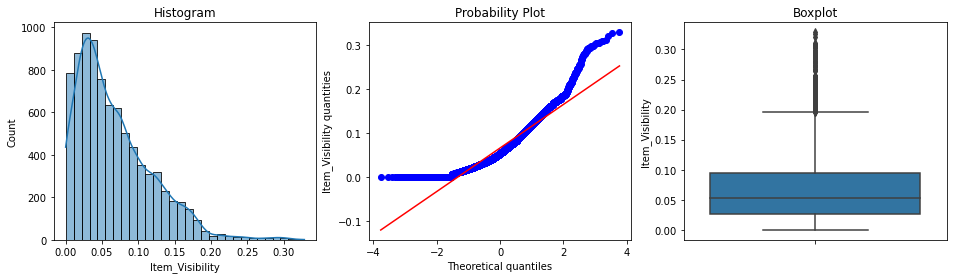

In [14]:
# Before 
diagnostic_plots(data, 'Item_Visibility')

In [15]:
# Trimming
upper_boundary, lower_boundary = find_boundaries(data, 'Item_Visibility')
outliers_Visibility = np.where(data['Item_Visibility'] > upper_boundary, True,
                    np.where(data['Item_Visibility'] < lower_boundary, True, False))

data = data.loc[~outliers_Visibility] # Overwriting data

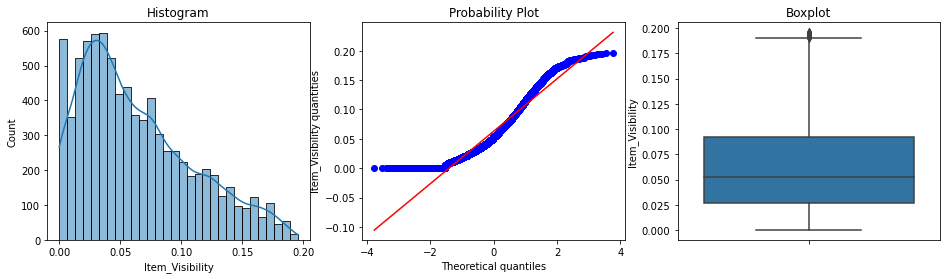

In [16]:
# After 
diagnostic_plots(data, 'Item_Visibility')

### Distribution of Numerical Variables
[Back to Top](#top)

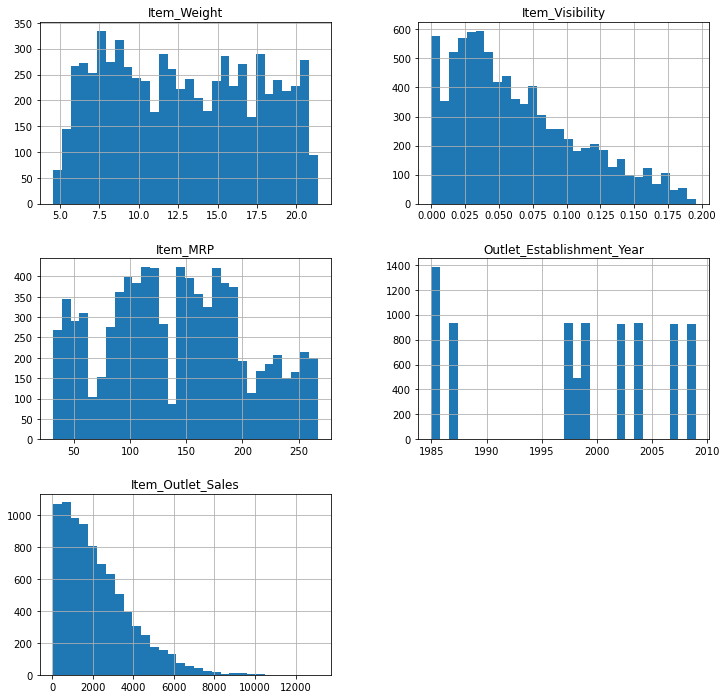

In [17]:
overviewOfNumCols = data.hist(bins=30, figsize=(12,12))
plt.show()

In [18]:
def diagnostic_plots_hist_qq(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("\n" + variable + " quantities")
    plt.show()

In [19]:
# find numerical variables
num_cols = [n for n in data.columns if data[n].dtypes !='O']
data[num_cols].isnull().mean().sort_values()

Item_Visibility              0.000000
Item_MRP                     0.000000
Outlet_Establishment_Year    0.000000
Item_Outlet_Sales            0.000000
Item_Weight                  0.165414
dtype: float64

In [20]:
data["Item_Visibility"] += 1
lt = LogTransformer(variables=["Item_Visibility"])

# fit transformer to data set
lt.fit(data)
data = lt.transform(data)

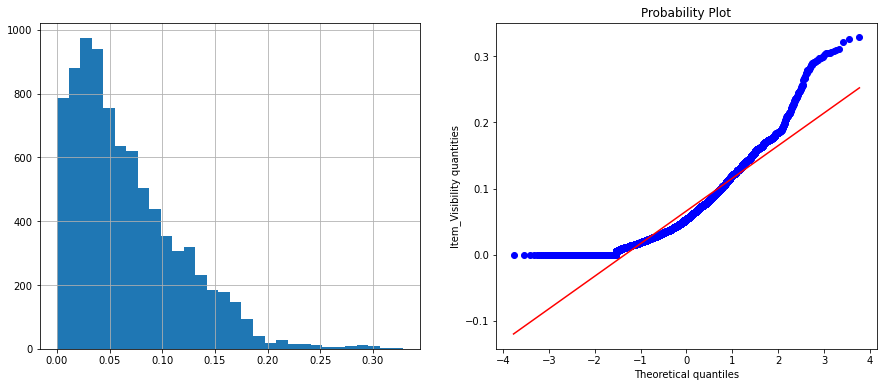

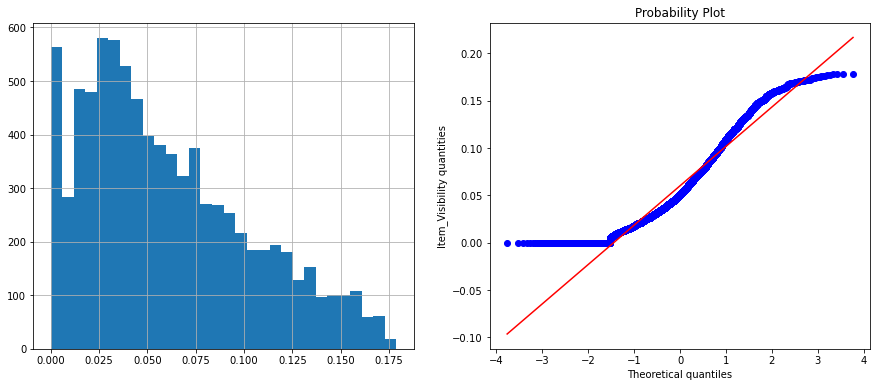

In [21]:
# Before Transforming 
diagnostic_plots_hist_qq(data_backup, 'Item_Visibility')\
# After Transforming 
diagnostic_plots_hist_qq(data, 'Item_Visibility')

In [22]:
# Set up yeo johnson transformer
#Item Visibility
yjt = YeoJohnsonTransformer(variables =["Item_MRP"])

# fit transformer to the dataframe
yjt.fit(data)
data = yjt.transform(data)

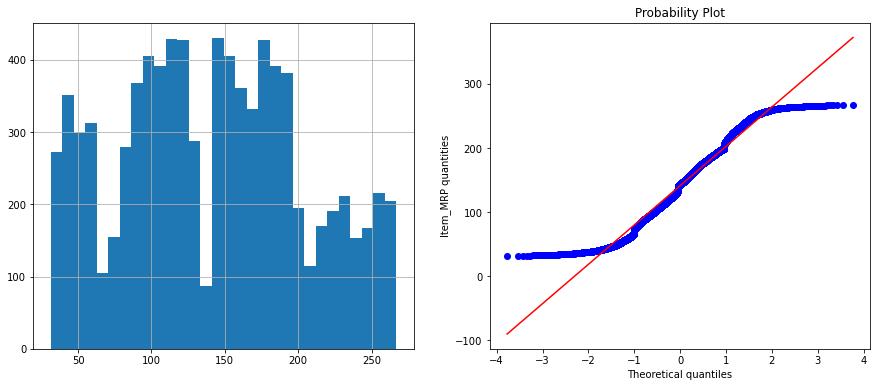

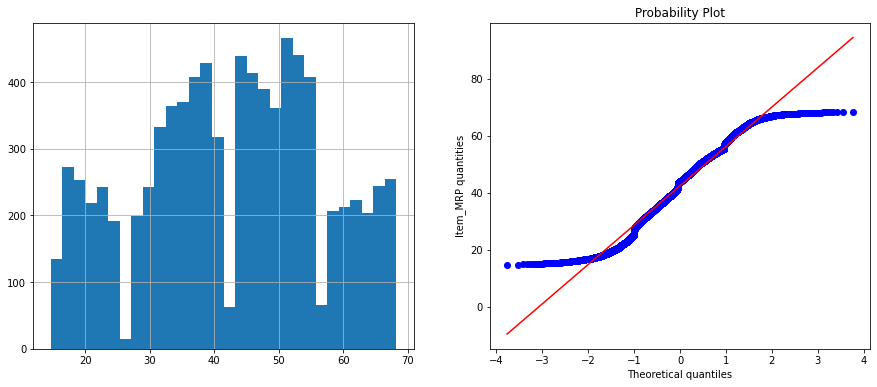

In [23]:
# Before Transforming 
diagnostic_plots_hist_qq(data_backup, 'Item_MRP')
# After Transforming 
diagnostic_plots_hist_qq(data, 'Item_MRP')

### Sorting Cardinality 

In [24]:
# User defined function to find Unique Values in dataset.
def find_unique_values(df):
    for variable in df:
        if (df[variable].dtypes == "O"):
            print(variable,":   ",df[variable].unique(),"\t",df[variable].nunique())
          
find_unique_values(data)

Item_Identifier :    ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 	 1559
Item_Fat_Content :    ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 	 5
Item_Type :    ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 	 16
Outlet_Identifier :    ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 	 10
Outlet_Size :    ['Medium' nan 'High' 'Small'] 	 3
Outlet_Location_Type :    ['Tier 1' 'Tier 3' 'Tier 2'] 	 3
Outlet_Type :    ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 	 4


In [25]:
# As we can see, some values of `Item_Fat_Content` are duplicated but has similar meaning in it.
# Hence we need to do some mapping to it.

fatContentMap = {"Item_Fat_Content":{"Low Fat":"Low Fat","low fat":"Low Fat","LF":"Low Fat",
                                    "Regular":"Regular","reg":"Regular"}}
data.replace(fatContentMap, inplace=True)

In [26]:
find_unique_values(data)

Item_Identifier :    ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 	 1559
Item_Fat_Content :    ['Low Fat' 'Regular'] 	 2
Item_Type :    ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 	 16
Outlet_Identifier :    ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 	 10
Outlet_Size :    ['Medium' nan 'High' 'Small'] 	 3
Outlet_Location_Type :    ['Tier 1' 'Tier 3' 'Tier 2'] 	 3
Outlet_Type :    ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 	 4


### Step 3: Train and Test Split <a id="step3"></a>
[Back to Top](#top)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Item_Outlet_Sales', axis=1), data['Item_Outlet_Sales'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((5865, 11), (2514, 11))

### Step 4: Missing Value Imputation <a id="step4"></a>
[Back to Top](#top)

In [28]:
# find the percentage of missing data per variable 
data.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.165414
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.279628
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [29]:
# first we need to make a list of columns that has missing data
features_num_mean = ['Item_Weight'] 
features_cat_frequent = ["Outlet_Size"]

In [30]:
# we instantiate each imputer within a pipeline

pipe = Pipeline(steps=[
    ('imp_num_mean', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_mean)),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent'))
])

In [31]:
# now we fit the preprocessor
pipe.fit(X_train)

Pipeline(steps=[('imp_num_mean', MeanMedianImputer(variables=['Item_Weight'])),
                ('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Outlet_Size']))])

In [32]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [33]:
# Check that there are 0 null values
display(X_train.isnull().sum())
display(X_test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [34]:
# As Item_Weight has null values, it can only be transformed after dealing with null values 
rt = ReciprocalTransformer(variables =['Item_Weight'])

# Fit
rt.fit(X_train)
# Transform
X_train = rt.transform(X_train)
X_test = rt.transform(X_test)

### Step 5: Categorical Data Encoding  <a id="step5"></a>
[Back to Top](#top)

In [35]:
find_unique_values(data)

Item_Identifier :    ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 	 1559
Item_Fat_Content :    ['Low Fat' 'Regular'] 	 2
Item_Type :    ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 	 16
Outlet_Identifier :    ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 	 10
Outlet_Size :    ['Medium' nan 'High' 'Small'] 	 3
Outlet_Location_Type :    ['Tier 1' 'Tier 3' 'Tier 2'] 	 3
Outlet_Type :    ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 	 4


### Ordinal Encoding

In [36]:
# let's create the encoder
ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',
                             variables=["Item_Type","Outlet_Identifier"])

In [37]:
ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['Item_Type', 'Outlet_Identifier'])

In [38]:
# let's transform train and test sets

X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

In [39]:
ordinal_enc.encoder_dict_

{'Item_Type': {'Baking Goods': 0,
  'Snack Foods': 1,
  'Canned': 2,
  'Starchy Foods': 3,
  'Health and Hygiene': 4,
  'Household': 5,
  'Fruits and Vegetables': 6,
  'Breakfast': 7,
  'Meat': 8,
  'Frozen Foods': 9,
  'Dairy': 10,
  'Soft Drinks': 11,
  'Hard Drinks': 12,
  'Breads': 13,
  'Others': 14,
  'Seafood': 15},
 'Outlet_Identifier': {'OUT027': 0,
  'OUT013': 1,
  'OUT046': 2,
  'OUT010': 3,
  'OUT035': 4,
  'OUT017': 5,
  'OUT045': 6,
  'OUT018': 7,
  'OUT049': 8,
  'OUT019': 9}}

### One Hot Encoding 

In [40]:
ohe_enc = OneHotEncoder(variables=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type",'Outlet_Type']) 
ohe_enc.fit(X_train_enc)

OneHotEncoder(variables=['Item_Fat_Content', 'Outlet_Size',
                         'Outlet_Location_Type', 'Outlet_Type'])

In [41]:
X_train_enc = ohe_enc.transform(X_train_enc)
X_test_enc = ohe_enc.transform(X_test_enc)

In [42]:
# One Hot Encoding for Top Categories of Item Identifier
ohe_enc_topCat = OneHotEncoder(
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables=['Item_Identifier'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)
    
ohe_enc_topCat.fit(X_train_enc)

OneHotEncoder(top_categories=5, variables=['Item_Identifier'])

In [43]:
X_train_enc = ohe_enc_topCat.transform(X_train_enc)
X_test_enc = ohe_enc_topCat.transform(X_test_enc)

In [44]:
# Before Encoding
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1688,FDL12,0.080000,Regular,0.114260,Baking Goods,23.359900,OUT027,1985,Medium,Tier 3,Supermarket Type3
6310,FDQ34,0.092166,Low Fat,0.150235,Snack Foods,35.513206,OUT013,1987,High,Tier 3,Supermarket Type1
3251,FDE26,0.107527,Low Fat,0.085265,Canned,44.074942,OUT046,1997,Small,Tier 1,Supermarket Type1
4125,FDC11,0.048780,Low Fat,0.132600,Starchy Foods,31.437257,OUT046,1997,Small,Tier 1,Supermarket Type1
2573,FDU46,0.097087,Regular,0.018452,Snack Foods,30.967308,OUT010,1998,Medium,Tier 3,Grocery Store


In [45]:
# After Encoding
X_train_enc.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Fat_Content_Low Fat,Outlet_Size_Medium,Outlet_Size_High,...,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Item_Identifier_FDX31,Item_Identifier_FDX45,Item_Identifier_FDR04,Item_Identifier_NCV41,Item_Identifier_FDI41
1688,0.080000,0.114260,0,23.359900,0,1985,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6310,0.092166,0.150235,1,35.513206,1,1987,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3251,0.107527,0.085265,2,44.074942,2,1997,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4125,0.048780,0.132600,3,31.437257,2,1997,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2573,0.097087,0.018452,1,30.967308,3,1998,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Step 6: Variable Discretization /Binning  <a id="step6"></a>
[Back to Top](#top)

In [46]:
# let's set up an equal-width discretizer into 15 intervals
disc = EqualWidthDiscretiser(bins=15, variables = ["Item_Weight"])

disc.fit(X_train_enc)

X_train_enc = disc.transform(X_train_enc)
X_test_enc = disc.transform(X_test_enc)

Text(0, 0.5, 'Number of observations per bin')

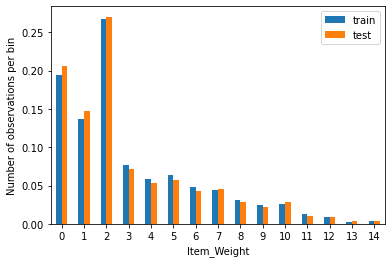

In [47]:
# Item_Weight

t1 = X_train_enc.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_train_enc)
t2 = X_test_enc.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_test_enc)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

In [48]:
# q is the desire number of equal frequency intervals/bins 
disc = EqualFrequencyDiscretiser(q=50, variables = ["Outlet_Establishment_Year"])

disc.fit(X_train_enc)

X_train_enc = disc.transform(X_train_enc)
X_test_enc = disc.transform(X_test_enc)

Text(0, 0.5, 'Number of observations per bin')

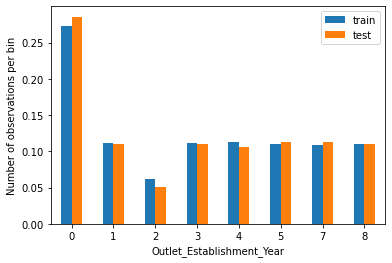

In [49]:
# Outlet_Establishment_Year

t1 = X_train_enc.groupby(['Outlet_Establishment_Year'])['Outlet_Establishment_Year'].count() / len(X_train_enc)
t2 = X_test_enc.groupby(['Outlet_Establishment_Year'])['Outlet_Establishment_Year'].count() / len(X_test_enc)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Step 7: Feature Engineer  <a id="step7"></a>
[Back to Top](#top)

In [50]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_enc)

# Fitting then transformation or prediction. 

# transform train and test sets
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

### Step 8: Linear Regression Modelling  <a id="step8"></a>
[Back to Top](#top)

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Root Mean Square Error (RMSE): The RMSE is the square root of the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of RMSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [51]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [52]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)
X_train_scaled.shape,X_test_scaled.shape

((5865, 23), (2514, 23))

In [53]:
X_train_student_final_premodel_version = X_train_scaled
X_test_student_final_premodel_version = X_test_scaled

y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

In [54]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
# The lower MAE, the better the model performance
print('train_rmse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_rmse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_rmse: 1321583.9470480096 
 test_rmse: 1203156.5905604237
train_r-sq: 0.5536181114535421 
 test_r-sq: 0.5647585466583145


## 1. Introduction <a id="part1."></a>
[Back to Top](#top)

In this Jupyter notebook, we are going to explore the dataset given, “supermarket.csv”, that was collected at various supermarket outlets and stores in different cities. After exploring the data, we are going to wrangle the data to predict the sales of each product at a particular outlet using a linear regression model and reviewing the performance of the model using these two measures, Root Mean Square Error (RMSE) which is the squared difference between prediction and actual observations, in which lower values of RMSE suggest better fit and model performance. Another measure is R-square (R2) which represents the percentage of the response variable that is explained by a linear model, in which an ideal R2 value can range from 0.6 to 0.9 and above. Generally, an R2 value above 0.5 is considered acceptable.

## 1.1. Introduction:  Problem Understanding <a id="part1.1."></a>
[Back to Top](#top)

We will need to understand the variables provided in the dataset before we start exploring our dataset. 
 - `Item_Weight` is the weight of a product. No units are specified, assuming it to be in kilograms.
 - `Item_Fat_Content` indicates whether a product is a low fat or regular. 
 - `Item_Visibility` is the percentage (%) of the total display area of all products in a store allocated for a particular product. 
 - `Item_Type` is the product category to that a product belongs.
 - `Item_MRP` is the maximum retail price (listed price) of a product.  
 - `Outlet_Identifier` suggests a unique store ID.
 - `Outlet_Establishment_Year` is the year in which a store was established.
 - `Outlet_Size is the size` of the store in terms of the ground area covered. 
 - `Outlet_Location_Type` is the type of city in which the store is located in. 
 - `Outlet_Type` suggests whether an outlet belongs to a grocery store or supermarket.
 - `Item_Outlet_Sales` is the target variable for this dataset which indicates the sales dollar amount of a product in a particular store. 


<hr>

## 2. Explore the Data <a id="part2."></a>

### 2.1. Relationship between Outlet Location Type and Outlet Sales <a id="part2.1."></a>
[Back to Top](#top)

<img src="Pictures for Report/Data Exploration/Total Outlet Sales by Outlet Location Type.png" width="750" Title = "Total Outlet Sales by Outlet Location Type">

This is a pie chart showing distribution of total outlet sales by outlet location type, showing in percentages (%). As shown, we can observe that Tier 3 outlet location type contributes to 41.1% of the total outlet sales followed by Tier 2 and Tier 1. From here, we can conclude that outlet location type affects the outlet sales, in which a higher tier is likely to contribute more to the total outlet sales.

### 2.2. Relationship between Item Type and Item Outlet Sales <a id="part2.2."></a>
[Back to Top](#top)

<img src="Pictures for Report/Data Exploration/Item Outlet Sales divided by Item Type.png" width="750" Title = "Total Item Outlet Sales by Item Type">

This is a tree map showing item outlet sales divided by item type, where the size of each item type represents number of items that are of the same item type and the color of each item represents the average sales for each item type, whereby a darker blue suggests a higher average sales and a lighter blue shows a lower average sales. As shown, `"Fruits"` and `"Vegetables"` and `"Snack Foods"` item type have more items as compared to other item types. However, item type like `"Starchy Foods"` has a higher average sales as compared to the rest. From this, we can observe that there are some item types have more items and some item type have a higher average sale despite a low variety of items.

### 2.3. Relationship between Item Visibility and Item Outlet Sales <a id="part2.3."></a>
[Back to Top](#top)

<img src="Pictures for Report/Data Exploration/Item Outlet Sales vs. Item Visibility.png" width="750" Title = "Total Item Outlet Sales by Item Visibility">

This is a density plot showing item outlet sales against item visibility, where each rectangle represents a certain count of items that falls into the corresponding range, with dark blue having the highest count of 139 and light green having the lowest count of 1. As shown in the density plot, we can observe that there are more items presented at the bottom left of the plot, which is where items are generating lesser than 4000 dollars and have an item visibility of less than 0.06 (6% of display area in a store). This shows that a majority of the items have low visibility and low sales, also despite having a high visibility, it is no guarantee that it will generate a high sales.

### 2.4. Relationship between Outlet Type & Outlet Identifer and Item Outlet Sales<a id="part2.4."></a>
[Back to Top](#top)

<img src="Pictures for Report/Data Exploration/Item Outlet Sales by Outlet Type & Outlet Identifer.png" width="800" Title = "Item Outlet Sales by Outlet Type & Outlet Identifer">

There are two visuals shown above describing the Item Outlet Sales by Outlet Type & Outlet Identifier. The bar chart (left) shows total outlet sales by outlet type, in which we can observe that Super Market Type1 generates 13M (Million) dollars of sales which is significantly higher than the other outlet types.

On the other hand, the tree map shows item outlet sales by outlet type and outlet identifier, whereby a darker color(purple) has a higher total outlet sales generated and the size of each outlet identifier(OUT0XX) represents the number of items in that particular outlet.

From here, we can observe that `"Grocery Store"` is the outlet type that has the lowest sales generated due to a low number of items available, whereas `"Supermarket Type1"` has the highest sales generated due to more outlet identifier and more items available. Thus, we can conclude that outlet sales and outlet type and identifier is proportionally related.

### 2.5. Relationship between Item Outlet Sales and Outlet Establishment Year <a id="part2.5."></a>
[Back to Top](#top)

<img src="Pictures for Report/Data Exploration/Item Outlet Sales by Outlet Establishment Year and Number of Outlet Established.png" width="800" Title = "Total Item Outlet Sales by Outlet Establishment Year">

This is a dual axis line chart showing the median item outlet sales by outlet establishment year in blue and number of outlets established in the corresponding in year shown on x axis in pink. It is observed that there are extremely low item outlet sales for outlet established in 1998 which could be due to the low number of outlets established in 1998 which suggest in a lesser item outlet occurrence in the dataset resulting in a low median item outlet sales. In addition, we notice that for outlets established in other years have a range of median item outlet sales of $1.6k (k suggest thousands) to $2.2k. In conclusion, we can conclude that the item outlet sales are lower when the outlet is established in year 1988. 

### 2.6. Relationship between Item Outlet Sales and Item Weight <a id="part2.6."></a>
[Back to Top](#top)
<img src="Pictures for Report/Data Exploration/Item Outlet Sales by Item Weight.png" width="800" Title = "Total Item Outlet Sales by Item Weight">

This is a histogram showing the sum of item outlet sales by item weight. We can observe that there are several ranges of item weight that generate a higher total item outlet sale, 6kg to 8kg, 12kg to 14 kg and 16 kg to 18kg. This few ranges of products generate to a higher total outlet sales as compared to others. Hence, we can infer that items that fall in this range are likely to have a higher item outlet sales to contribute to the total item outlet sales.

<hr>

## 3. Cleanse the Data <a id="part3."></a>

## 3.1. Outliers <a id="part3.1."></a>
[Back to Top](#top)

### 3.1.1. Finding outliers <a id="part3.1.1."></a>
[Back to Top](#top)

By using user-defined function,` find_boundaries`, which estimate 1.5 times of Interquartile Range (IQR) to calculate the boundaries. In which, this function will return the upper and lower boundary found. Then, we pass in the dataset and variable to find its corresponding upper and lower boundary and values that fall above the upper boundary or below the lower boundary are called outliers. After finding if outliers exist for all of the numerical variables, we then decide which technique to use, 

 - Trimming, removing of outliers found in the dataset.
 - Capping
  - 90% Winsorization which replaces outliers with the value at 5th percentile or 95th percentile, whichever it is closest to.
  - Inter-quartile range proximity rule, similar to Winsorization but replace outliers with value at Q1 – 1.5 x IQR or Q3 – 1.5 x IQR, whichever it is closest to.
  
In this dataset, there are outliers for variable, `Item_Visibility` and `Item_Outlet_Sales`, however as `Item_Outlet_Sales` is the target variable; hence we will not be applying any data transformation to it. 


### 3.1.2. Dealing with Outliers <a id="part3.1.2."></a> 
[Back to Top](#top)

Graphs shown below are diagnostic plots of Item_Visibility initially. We can observe that all the outliers found on the right tail, hence should we be using winsorisation technique, it will be logical to do it to the right tail only. 
<img src="Pictures for Report/Data Cleansing/Item_Visibility Before.png" width="750" Title = "Item_Visibility before techiques applied">

<b>Trimming technique: </b>
<img src="Pictures for Report/Data Cleansing/Trimming on Item_Visibility PLOTS.png" width="650" Title = "Item_Visibility Trimming Plots"> 
<img src="Pictures for Report/Data Cleansing/Trimming on Item_Visibility SCORE.png" width="250" Title = "Item_Visibility Trimming Model Score">

<b>Winsorisation, 95% Quantiles Right: </b>
<img src="Pictures for Report/Data Cleansing/Winsorisation on Item_Visibility fold(0.05 right) PLOTS.png" width="650" Title = "Item_Visibility Winsorisation 95% Quantiles Right "> 
<img src="Pictures for Report/Data Cleansing/Winsorisation on Item_Visibility fold(0.05 right) SCORE.png" width="250" Title = "Item_Visibility Winsorisation 95% Quantiles Right Model Score">

<b>Winsorisation, 1.5 IQR Right: </b>\
<img src="Pictures for Report/Data Cleansing/Winsorisation on Item_Visibility fold(1.5 right) PLOTS.png" width="650" Title = "Item_Visibility Winsorisation 1.5 IQR Right"> 
<img src="Pictures for Report/Data Cleansing/Winsorisation on Item_Visibility fold(1.5 right) SCORE.png" width="250" Title = "Item_Visibility Winsorisation 1.5 IQR Right Model Score">

Graphs and Model score shown above only differ in the time of techinques used to deal with outliers. After trying out and comparing the different techniques using RMSE & R2 score and diagnostic plots , I found out that trimming best suits the model, with the test RMSE and R2 indicating that that there is better fit and model performance as the test RMSE is the lowest of all techniques used and test R2 being closer to 1 as compared to the rest. 

## 3.2. Missing Data <a id="part3.2."></a>
[Back to Top](#top)

### 3.2.1. Finding Missing Data <a id="part3.2.1."></a>
[Back to Top](#top)

As missing data is not permitted by most Machine Learning (ML) models hence we will need to either remove or transform into permitted values to produce a complete dataset that can be train by ML models. Using `data.isnull().mean()` to find the percentage of missing data per variable. `Item_Weight has 17.2%` of missing data and `Outlet_Size has 28.3%`, in which, `Item_Weight` is a numerical variable while `Outlet_Size` is a categorical variable. As there are different types of variables hence, we are going to perform different imputation techniques on different variables. Hence, we are going to use a imputation pipeline to apply different imputation techniques.

### 3.2.2. Dealing with Missing Data<a id="part3.2.2."></a>
[Back to Top](#top)

<b> One of the techniques is to remove all missing data by Complete Case Analysis (CCA): </b>
<img src="Pictures for Report/Data Cleansing/Removing data dropna().png" width="700" Title = "Removing Missing Data"> 
<img src="Pictures for Report/Data Cleansing/Removing data dropna() SCORE.png" width="250" Title = "Removing Missing Data Score">
This means to discard observations where the values in any of the variables are missing, which can be applied to both categorical & numerical data. In this case, we are removing rows that contains missing values in it, which leads to 28.3% of the data being remove. This leads to removal of a large portion of data which eventually leads to a low R2 score of less than 0.5 which suggests that more than 50% of the variability in the outcome of data cannot be explained by the model. Hence, we will not be using CCA.

<b>Median Imputation for Item_Weight & Frequent Imputation for Outlet_Size:</b>
<img src="Pictures for Report/Data Cleansing/Imputation (Median_Frequent) CODE.png" width="700" Title = "Median and Frequent Imputation"> 
<img src="Pictures for Report/Data Cleansing/Imputation (Median_Frequent) SCORE.png" width="250" Title = "Median and Frequent Imputation Score">

This means that we are replacing missing values of `Item_Weight` with the median value of `Item_Weight` and replace missing values of `Outlet_Size` with the most frequent values of `Outlet_Size`. 

<b>Mean Imputation for Item_Weight & Missing Imputation for Outlet_Size:</b>
<img src="Pictures for Report/Data Cleansing/Imputation (Mean_Missing) CODE.png" width="700" Title = "Median and Frequent Imputation">
<img src="Pictures for Report/Data Cleansing/Imputation (Mean_Missing) SCORE.png" width="250" Title = "Median and Frequent Imputation Score">

From the RMSE and R2 test score, we can observe that median imputation for `Item_Weight` and frequent imputation for `Outlet_Size` is better for missing value imputation.

We can see that the test RMSE for mean imputation is slightly lower than test RMSE for mean imputation and test R2 for median imputation is closer to 1 than test R2 for mean imputation, this indicates that median imputation has a better fit and model performance. 

On the other hand, test RMSE for frequent imputation is slightly lower than test RMSE for missing imputation and test R2 for frequent imputation is closer to 1 than test R2 for missing imputation, this indicates that median imputation has a better fit and model performance.

In conclusion, we are using median imputation for Item_Weight and Frequent Imputation for Outlet_Size as it has the best fit and model performance as compared to other imputation methods. 

## 3.3. Sorting Cardinality <a id="part3.3."></a>
[Back to Top](#top)

A user defined function, `find_unique_values` to find if there are any values in categorical variables that has similar meaning. The function prints out variable name, its corresponding list of unique values and number of unique values, which can assist in spotting for values with similar meaning especially in categorical variables. It can also allow us to have a overview of the number of unique values in each variable which can help as decide the type of encoding to use in the following steps.

<img src="Pictures for Report/Data Cleansing/find_unique_values BEFORE.png" width="600" Title = "Finding Unqiue Values">

As we can see, some values of `Item_Fat_Content` are duplicated but has similar meaning in it, such as “LF” and “low fat” is the same as “Low Fat”. Also, by knowledge of the dataset, we know that `Item_Fat_Content` we know that values of it is indicating whether product is low fat or not hence we will do mapping to it. As this step was done before missing values imputation, hence we can observe that `Outlet_Size` has “nan” to it but does not count as a unique value. 

<img src="Pictures for Report/Data Cleansing/find_unique_values AFTER.png" width="600" Title = "Mapping Unique Values">

<hr>

## 4. Data Transformation <a id="part4."></a>
Data is transformed so that it is better-organized and can fit algorithms better as most ML models do not take in strings as values, they only accept numerical values 

## 4.1. Categorical Data <a id="part4.1."></a>
[Back to Top](#top)

There are several methods to encode categorical data, such as <b>Ordinal Encoding</b>, <b>One Hot Encoding</b> and <b>Target Mean Encoding</b>. By using the user-defined function earlier, `find_unique_values`, we can see the number of unique values in each categorical variable. Hence, I have decided to use Ordinal Encoding for those variables that has more unique values, whereas for variables with fewer unique values, we are using one hot encoding as they are going to generate lesser columns as compared to those variables with more unique values. 

<b>Number of Unique values for categorical variables</b>
<blockquote>
    
Item_Identifier     : 	 1559 
    
Item_Fat_Content     : 	 2
    
Item_Type            :   16
    
Outlet_Identifier    :   10
    
Outlet_Size          :   3
    
Outlet_Location_Type :   3
    
Outlet_Type          :   4
    
</blockquote>

### 4.1.1. Ordinal Encoding <a id="part4.1.1."></a>
[Back to Top](#top)

<img src="Pictures for Report/Data Transformation/Categorical/Ordinal Encode (ItemType_OutletIdentifier).png" width="500" Title = "Ordinal Encoding for Item Type & Outlet Identifer">
<img src="Pictures for Report/Data Transformation/Categorical/Ordinal Encode (ItemType_OutletIdentifier) SCORE.png" width="250" Title = "Ordinal Encoding for Item Type & Outlet Identifer Score">

As `Item_Type` and `Outlet_Identifer` has 16 and 10 unique values respectively, hence we will using ordinal encoding so that the model can find patterns that relate to the target. Also, as they have too many unique values, it will not be efficient to use one hot encoding for it.    

<img src="Pictures for Report/Data Transformation/Categorical/Ordinal Encode (ItemType_OutletIdentifier_ItemIdentifier).png" width="700" Title = "Ordinal Encoding for Item Identifier">
<img src="Pictures for Report/Data Transformation/Categorical/Ordinal Encode (ItemType_OutletIdentifier_ItemIdentifier) ERROR.png" width="500" Title = "Error - Ordinal Encoding for Item Identifier">

As there are 1559 unique values in `Item_Identifier`, hence there are insufficient index which leads to NaN (null) values being introduced in the process of encoding, which leads to failure in running the Linear Regression model.

### 4.1.2. One Hot Encoding <a id="part4.1.2."></a>
[Back to Top](#top)

<img src="Pictures for Report/Data Transformation/Categorical/One Hot Encode (ItemFatContent_OutletSize_OutletLocationType_OutletType).png" width="650" Title = "One Hot Encoding for 4 Numerical Variables">
<img src="Pictures for Report/Data Transformation/Categorical/One Hot Encode (ItemFatContent_OutletSize_OutletLocationType_OutletType) SCORE.png" width="250" Title = "One Hot Encoding for 4 Numerical Variables Score">

We are doing One Hot Encoding for  `Item_Fat_Content`, `Outlet_Size`, `Outlet_Location_Type` and `Outlet_Type`which has 2,3,3 and 4 unique values respectively. As they have lesser unique values as compared to other numerical variables hence, they one hot encoding is more suitable.

<img src="Pictures for Report/Data Transformation/Categorical/One Hot Encode (ItemFatContent_OutletSize_OutletLocationType_OutletType_ItemType_Outlet_Identifier).png" width="650" Title = "One Hot Encoding for 6 Numerical Variables">
<img src="Pictures for Report/Data Transformation/Categorical/One Hot Encode (ItemFatContent_OutletSize_OutletLocationType_OutletType_ItemType_Outlet_Identifier) SCORE.png" width="250" Title = "One Hot Encoding for 6 Numerical Variables Score">

The picture shown above shows the result of applying `Item_Type` and `Outlet_Identifier` which has 16  and 10 unique values respectively. As shown, a lower test RMSE and a higher R2 was observed. Hence, we will only be applying one hot encoding to `Item_Fat_Content`, `Outlet_Size`,`Outlet_Location_Type` and `Outlet_Type`.

### 4.1.3. One Hot Encoding for Top Categories<a id="part4.1.3."></a>
[Back to Top](#top)

As `Item_Identifier` has 1559 unique values hence Ordinal Encoding and One Hot Encoding are not suitable for it. Thus, we might need to consider dropping the column, however, by dropping a column we might be losing some crucial information. Hence, we need to try one hot encoding to top categories of `Item_Identifier` and compare the result.

<b> Applying One Hot Encoding to Item Identifier</b>

<img src="Pictures for Report/Data Transformation/Categorical/Top One Hot Encode (ItemIdentifer).png" width="450" Title = "One Hot Encoding for Top Categories">
<img src="Pictures for Report/Data Transformation/Categorical/Top One Hot Encode (ItemIdentifer) SCORE.png" width="200" Title = "One Hot Encoding for Top Categories Score">

<b> Dropping Column</b>
<img src="Pictures for Report/Data Transformation/Categorical/Dropping Columns (ItemIdentifier).png" width="450" Title = "Dropping Item Identifier">
<img src="Pictures for Report/Data Transformation/Categorical/Dropping Columns (ItemIdentifier) SCORE.png" width="250" Title = "Dropping Item Identifer Score">

From here, we can see that by dropping the column `Item_Identifier`, it shows a better model performance and fit when we compare the difference in test RMSE and R2 for both techniques. Hence we will not apply one hot encoding to `Item Identifier` and may need to consider dropping the column in Feature Engineering. 

## 4.2. Numerical Data <a id="part4.2."></a>
[Back to Top](#top)

Some ML models assume that numerical variables input are normally distributed. Hence, we need to apply mathematical transformation to change the distribution of data if variables are not. Hence, we will need to perform trail and error, to observe if there are improvement in model performance to know if a transformation was effective or not.
<img src="Pictures for Report/Data Transformation/Numerical/Distribution of Numerical Data.png" width="500" Title = "Distribution of Numerical Variables">

The histograms shown above are to inspect numerical variable distributions. `Item_Weight` shows a Multimodal distribution meaning there are many peaks close together. `Item_Visibility` is a right skewed distribution. `Item_MRP` is a Comb Distribution, whereby bars are alternately tall and short. `Outlet_Establishment_Year` is an even distribution, except for year 1985 being the peak. `Item_Outlet_Sales`, target variable, is a right skewed distribution with most of its sales falling below 5000. From this we can see that `Item_Weight` ,`Item_Visibility`, `Item_MRP` and `Outlet_Establishment_Year` may need transformation. We cannot transform `Item_Outlet_Sales` as it is the target variable.

### 4.2.1. Item Weight Transformation <a id="part4.2.1."></a>
[Back to Top](#top)

<b> Yeo Johnson Transformation </b>
<img src="Pictures for Report/Data Transformation/Numerical/YeoJohnson ItemWeight CODE.png" width="550" Title = "Yeo Johnson Transformation for Item Weight">
<img src="Pictures for Report/Data Transformation/Numerical/YeoJohnson ItemWeight SCORE.png" width="250" Title = " Score of Yeo Johnson Transformation for Item Weight">

<b> Power (Cube) Transformation </b>
<img src="Pictures for Report/Data Transformation/Numerical/Cube ItemWeight CODE.png" width="500" Title = "Cube Transformation for Item Weight">
<img src="Pictures for Report/Data Transformation/Numerical/Cube ItemWeight SCORE.png" width="200" Title = " Score of Cube Transformation for Item Weight">

<b> Reciprocal Transformation </b>
<img src="Pictures for Report/Data Transformation/Numerical/Reciprocal ItemWeight CODE.png" width="500" Title = "Reciprocal Transformation for Item Weight">
<img src="Pictures for Report/Data Transformation/Numerical/Reciprocal ItemWeight SCORE.png" width="200" Title = " Score of Reciprocal Transformation for Item Weight">
After trying multiple transformations, we observed that the transformation that is most suitable for `Item_Weight` is Reciprocal Transformation as it has a lower test RSME and a higher R2 score which indicates a better fit and model performance.

### 4.2.2. Item Visibility Transformation <a id="part4.2.2."></a>
[Back to Top](#top)

<b> Before Transformation</b>
<img src="Pictures for Report/Data Transformation/Numerical/ItemVisibility BEFORE PLOT.png" width="650" Title = "Diagnostic Plots for Item Visibility">

<b> Log Transformation </b>
<img src="Pictures for Report/Data Transformation/Numerical/ItemVisibility AFTER Log PLOT.png" width="600" Title = "Diagnostic Plots for Log Item Visibility">
<img src="Pictures for Report/Data Transformation/Numerical/Log +1 ItemVisibility CODE.png" width="450" Title = "Log Transformation for Item Visibility">
<img src="Pictures for Report/Data Transformation/Numerical/Log +1 ItemVisibility SCORE.png" width="250" Title = " Score of Log Transformation for Item Visibility">
\begin{equation}
X_t = \log(X +1)
\end{equation}

As some values `Item_Visibility` are not positive, minimum value of it appears to be 0, hence we will need to add 1 to it before we can apply Log transformation.

<b> Box Cox Transformation </b>
<img src="Pictures for Report/Data Transformation/Numerical/ItemVisibility AFTER BoxCox PLOT.png" width="600" Title = "Diagnostic Plots for Box Cox Item Visibility">
<img src="Pictures for Report/Data Transformation/Numerical/BoxCox +1 ItemVisibility CODE.png" width="450" Title = "Box Cox Transformation for Item Visibility">
<img src="Pictures for Report/Data Transformation/Numerical/BoxCox +1 ItemVisibility SCORE.png" width="250" Title = " Score of Box Cox Transformation for Item Visibility">
\begin{equation}
X_t = 
\begin{cases}
  (X^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0 \\    
  \log(X)  & \text{if } \lambda =0
\end{cases}
\end{equation}

Similarly, to Log transformation, Box Cox transformation only accepts positive values, hence we need to add 1 to the data before performing Box Cox transformation.

After trying multiple transformations, we observed that the transformation that is most suitable for `Item_Visibility` is Log Transformation as it has a lower test RSME and a higher R2 score which indicates a better fit and model performance.

### 4.2.3. Item MRP Transformation <a id="part4.2.3."></a>
[Back to Top](#top)

<b> Before Transformation</b>
<img src="Pictures for Report/Data Transformation/Numerical/ItemMRP BEFORE PLOT.png" width="650" Title = "Diagnostic Plots for Item MRP">

<b> Power (Square) Transformation </b>
<img src="Pictures for Report/Data Transformation/Numerical/ItemMRP AFTER Square PLOT.png" width="650" Title = "Diagnostic Plots for Item MRP">
<img src="Pictures for Report/Data Transformation/Numerical/Square ItemMRP CODE.png" width="500" Title = "Square Transformation for Item Weight">
<img src="Pictures for Report/Data Transformation/Numerical/Square ItemMRP SCORE.png" width="200" Title = " Score of Square Transformation for Item Weight">
\begin{equation}
X_t = X^{0.5} 
\end{equation}

<b> YeoJohnson Transformation </b>
<img src="Pictures for Report/Data Transformation/Numerical/ItemMRP AFTER YeoJohnson PLOT.png" width="650" Title = "Diagnostic Plots for Item MRP">
<img src="Pictures for Report/Data Transformation/Numerical/YeoJohnson ItemMRP CODE.png" width="400" Title = "Square Transformation for Item Weight">
<img src="Pictures for Report/Data Transformation/Numerical/YeoJohnson ItemMRP SCORE.png" width="200" Title = " Score of Square Transformation for Item Weight">

After trying multiple transformations, we observed that the transformation that is most suitable for `Item_MRP ` is YeoJohnson Transformation as it has a lower test RSME and a higher R2 which indicates a better fit and model performance. In addition, Q-Q plot for it follows the red line better which suggest that it is closer to a normal distribution. 

### 4.2.4. Outlet Establishment Year Binning  <a id="part4.2.4."></a>
[Back to Top](#top)

In Binning, we are trying to transform continuous variables into discrete variables by creating a set of contiguous intervals so that we change the distribution of skewed variables and improve the performance of some ML models. As we are unable to transform Outlet Establishment Year due to the wide spread of data values, we will be binning it. 

<b> Before Binning</b>
 <img src="Pictures for Report/Data Transformation/Numerical/OutletEstablishmentYear BEFORE PLOT.png" width="400" Title = "Histogram of Outlet Establishment Year">

<b> Equal Width Binning</b>
 <img src="Pictures for Report/Data Transformation/Numerical/EqualWidth OutletEstablishmentYear CODE.png" width="550" Title = "Equal Width Binning for Outlet Establishment Year">
 <img src="Pictures for Report/Data Transformation/Numerical/EqualWidth OutletEstablishmentYear SCORE.png" width="250" Title = "Equal Width Binning for Outlet Establishment Year Score">

<b> Equal Frequency Binning</b>
 <img src="Pictures for Report/Data Transformation/Numerical/EqualFreq OutletEstablishmentYear CODE.png" width="600" Title = "Equal Frequency Binning for Outlet Establishment Year">
 <img src="Pictures for Report/Data Transformation/Numerical/EqualFreq OutletEstablishmentYear SCORE.png" width="250" Title = "Equal Frequency Binning for Outlet Establishment Year Score">
 
 After trying out Equal Width and Equal Frequency binning, I observe that Equal Frequency binning is more suitable for `Outlet_Establishment_Year` as it was observed that there is a lower test RSME and a higher R2 indicating a better fit and model performance by 2.3283064365386963e-10 and 1.1102230246251565e-16 respectively. 
 
 

### 4.2.5. Item Weight Binning  <a id="part4.2.5."></a>
[Back to Top](#top)

<b> Equal Frequency Binning</b>
 <img src="Pictures for Report/Data Transformation/Numerical/EqualFreq Item Weight CODE.png" width="550" Title = "Equal Frequency Binning for Item Weight">
  <img src="Pictures for Report/Data Transformation/Numerical/EqualFreq Item Weight SCORE.png" width="250" Title = "Equal Frequency Binning for Item Weight Score">

<b> Equal Width Binning</b>
 <img src="Pictures for Report/Data Transformation/Numerical/EqualWidth Item Weight CODE.png" width="550" Title = "Equal Width Binning for Item Weight">
  <img src="Pictures for Report/Data Transformation/Numerical/EqualWidth Item Weight SCORE.png" width="250" Title = "Equal Width Binning for Item Weight Score">
  
After trying out Equal Width and Equal Frequency binning, I observe that Equal Width binning is more suitable for `Item Weight` as it was observed that there is a lower test RSME and a higher R2 indicating a better fit and model performance by -1111.3626800558995 and 0.0004020350400374406 respectively. 

## 5. Feature Engineer <a id="part5."></a>

## 5.1. Feature Scaling <a id="part5.1."></a>
[Back to Top](#top)

Feature Scaling helps by making features to similar scale so that it helps algorithms converge faster and hence improving performance. As features with bigger value ranges tend to dominate over features with smaller ranges.

<b> MinMax Scaling</b>
<img src="Pictures for Report/Feature Engineer/MinMax Scaler CODE.png" width="550" Title = "MinMax Scaling">
<img src="Pictures for Report/Feature Engineer/MinMax Scaler SCORE.png" width="250" Title = "MinMax Scaling Score">

<b> Robust Scaling</b>
<img src="Pictures for Report/Feature Engineer/Robust Scaler CODE.png" width="550" Title = "Robust Scaling">
<img src="Pictures for Report/Feature Engineer/Robust Scaler SCORE.png" width="250" Title = "Robust Scaling Score">

<b> Standard Scaling</b>
<img src="Pictures for Report/Feature Engineer/Standard Scaler CODE.png" width="550" Title = "Standard Scaling">
<img src="Pictures for Report/Feature Engineer/Standard Scaler SCORE.png" width="250" Title = "Standard Scaling Score">

As we compare the three scaling, we observe that the result does not differ much in terms of test RMSE and R2. With MinMax scaling and Robust scaling have the same test RMSE and R2 score and Standard scaling having a slightly lower test RMSE and higher R2 of -271.5661521642469 and -9.823895548888295e-05 respectively. Thus, indicating that Standard scaling provides a better fit and model performance. 

## 5.2. Create new features / Drop features <a id="part5.2."></a>
[Back to Top](#top)

Some features may not be well explained on its own, hence we may need to use some domain knowledge of the dataset and through mathematical or statistical operation to create new features to better explain parts of the data. An alternative way to deal with features that explains a very low percentage of data is to drop features. In this way, we may be able top increase the speed and efficiency of model training, while not giving up much in coverage of the dataset. 

### 5.2.1. Principal Component Analysis (PCA)  <a id="part5.2.1."></a>
[Back to Top](#top)

<img src="Pictures for Report/Feature Engineer/PCA 23 Features CODE.png" width="450" Title = "23 Features PCA">
<img src="Pictures for Report/Feature Engineer/PCA 23 Features PLOT.png" width="350" Title = "23 Features PCA Plot">
<img src="Pictures for Report/Feature Engineer/PCA 23 Features SCORE.png" width="250" Title = "23 Features PCA Score">

The pictures above show the number of features and its corresponding explained variance ratio, RMSE and R2 scores and plot. As observed, we can see that the last 4 features of the PCA explained little to the dataset, hence we can try to remove the last 4 features to see if it helps to improve the model. 

<img src="Pictures for Report/Feature Engineer/PCA 19 Features CODE.png" width="450" Title = "19 Features PCA">
<img src="Pictures for Report/Feature Engineer/PCA 19 Features PLOT.png" width="350" Title = "19 Features PCA Plot">
<img src="Pictures for Report/Feature Engineer/PCA 19 Features SCORE.png" width="250" Title = "19 Features PCA Score">
As shown above, after reducing the number of features to 19 (remove last 4 features), there is a slight increase in the test RSME and slight decrease in test R2 which indicates that it is not of a better fit as compared to keeping all features. In addition, this means that the reduction of features in this case has reduce the performance of the model. Hence, after comparing the result and impact of reduction of features, I have decided not to remove any features, as they have been properly transformed, discretized and scaled, ready to pass into the model.

## 6. Linear Regression Model <a id="part6."></a>
[Back to Top](#top)

## 6.1. Build and Evaluate the model <a id="part6.1."></a>
[Back to Top](#top)

<img src="Pictures for Report/Linear Regression Model/Changing Array to Dataframe.png" width="800" Title = "Array to Dataframe">
<b> Shape of Train and Test Data before Wrangle</b>
<img src="Pictures for Report/Linear Regression Model/Shape of data before wrangle.png" width="300" Title = "Shape of Training and Test Dataframe">
<b> Shape of Train and Test Data after Wrangle</b>
<img src="Pictures for Report/Linear Regression Model/Shape of data after wrangle.png" width="350" Title = "Shape of Training and Test Dataframe">

After exploration of data, cleansing data which includes missing data imputation, finding and dealing with outliers, data transformation on categorial data such as ordinal encoding and one hot encoding, data transformation on numerical data including different method such as Logarithm, Reciprocal and Box-Cox. Feature Engineer, feature scaling to minimise ranges between variables and creating or dropping of features. We conclude all the wrangling technique stated above and store them as `X_train_scaled` for training data and `X_test_scaled` for test data. After scaling this variables are array, hence we will need top change them to dataframe which will be passed into the model later on. 

We can see that the shape of training and test data now has become large, with more columns included due to data transformation like categorical encoding.


<b> Assign Cleaned and Transformed data</b>
<img src="Pictures for Report/Linear Regression Model/Assignation of Cleaned and Transformed data.png" width="550" Title = "Shape of Training and Test Dataframe">

Assigning of cleaned and transformed data to `X_train_final`, `X_test_final`, `y_train_final` and `y_test_final`. 

<b>Building Linear Regression Model and evaluating with RMSE & R2</b>
<img src="Pictures for Report/Linear Regression Model/Building LR Model.png" width="750" Title = "Building LR Model">

We import the libraries need to build a Linear Regression Model from scikit learn. We will then evaluate the model performance of a linear regression model using two measures, `Root Mean Square (RMSE)` which suggest the square root of the variance of residual, difference between an observed value of response variable and value of response variable predicted from regression line and `R-Square (R2)`, the squared difference between prediction and actual observations. In which, a lower RMSE indicates better fit and model performance and a value of R2 closer to 1.0 indicates better fit and model performance. Hence, we will need to focus on result of test RMSE and R2. 

[Reference to Residual (in linear regression)](https://nzmaths.co.nz/category/glossary/residual-linear-regression#:~:text=The%20difference%20between%20an%20observed,predicted%20from%20the%20regression%20line.)

The final result of the Linear Regression Model is shown below: 
<blockquote>
    
train_rmse: 1321583.9470480096 

 test_rmse: 1203156.5905604237
 
train_r-sq: 0.5536181114535421 

 test_r-sq: 0.5647585466583145
</blockquote>

## 7. Summary and Further Improvements <a id="part7."></a>
[Back to Top](#top)

## 7.1. Summarize findings <a id="part7.1."></a>
[Back to Top](#top)

In summary, we have wrangled the dataset by performing data transformation, data cleansing and scaling which is passed into a Linear Regression Model which we will evaluate it using RMSE and R2. These two values are 1.203M (1203156.5905604237) and 0.5647 (0.5647585466583145) for `RMSE` and `R2` respectively. `RMSE` is related to the prediction of target variable of the dataset, which is normally measured in thousands while a good `R2` value range from 0.6 to 0.9, in which greater than 0.5 are considered acceptable. Hence, we can conclude that this wrangled data is considered decent as it has a value of 0.5 and above for R2 however, it can be further improved.

## 7.2. Explain possible further improvements <a id="part7.2."></a>
[Back to Top](#top)

Possible improvements are to increase the number of records, as some of the variables with wide range of values are difficult to transform them to be as close to being normally distributed. With an increase in the number of records, variables may be right skewed or left skewed which we are able to transform it to normally distributed easily as compared to distribution lime `Outlet_Establishmen_Year` which has an odd distribution which makes data transformation difficult. 

Another possible improvement to increase the model performance is removing the outliers of the target variable, as there are a small number of outliers as compared to the total number of records. These outliers are considered as the top selling products for the supermarket which should be noticed at data exploration stage. However, when predicting item outlet sales by products, we can exclude these top selling products so that it makes a stronger correlation between variables.


~ End of Report ~